# 取出不同浏览器分布

In [1]:
import sys
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
%run /home/doom/github/NginxConfParser/nginxlogparser.py

In [3]:
cd logs

/home/doom/tmp/logs


In [4]:
result = logparser('app004.log')

In [5]:
dtcolumns = ['request_time', 'remote_addr', 'http_referer', 'time_local', 'request', 'bytes_sent', 'status', 'http_user_agent', 'host']
df = DataFrame(result, columns=dtcolumns)

In [6]:
result[1]

['0.000',
 '211.139.151.74',
 'http://app.gaokaozhitongche.com/wycf/getGaokaoScore?province=guangdong',
 datetime.datetime(2016, 6, 25, 3, 24, 30),
 'GET /assets/3263c067/css/bootstrap-yii.css HTTP/1.1',
 '5534',
 '200',
 'Mozilla/5.0 (Linux; Android 5.1; m1 note Build/LMY47D) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/37.0.0.0 Mobile MQQBrowser/6.2 TBS/036524 Safari/537.36 MicroMessenger/6.3.18.800 NetType/cmwap Language/zh_CN',
 'app.gaokaozhitongche.com']

In [7]:
ds = Series([x[-2].split()[0] for x in result if x[-2]])

### 修改大小

In [8]:
import pylab
pylab.rcParams['figure.figsize'] = 20, 5

In [9]:
ds.value_counts()[:10]         #agent类型

Mozilla/5.0                            1471930
Mozilla/4.0                             892911
-                                       733630
GKZTC/iOS/2.2.6_2.2.6.060220/iPhone      54733
GKZTC/Android/2.2.6_29/4.4.4/HM          17455
Dalvik/2.1.0                             14971
GKZTC/Android/2.2.6_29/6.0.1/MI          14240
Dalvik/1.6.0                             12666
GKZTC/Android/2.2.6_29/5.0.2/Redmi        9006
GKZTC/Android/2.2.6_29/5.1.1/Redmi        8494
dtype: int64

In [10]:
df_agent = df[df.http_user_agent.notnull()]

In [11]:
df_agent.index=df.pop('remote_addr')

In [43]:
agent = np.where(df_agent['http_user_agent'].str.contains('android'), 'android', 'Not android')
agent_ip = np.where(df_agent['http_user_agent'].str.contains('iphone'), 'ip', 'Not ip')

In [13]:
agent

array(['Not android', 'Not android', 'Not android', ..., 'Not android',
       'Not android', 'Not android'], 
      dtype='<U11')

In [44]:
by_tz_os = df_agent.groupby(['status', agent])
by_status_agent = df_agent.groupby(['status', agent_ip])

In [45]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts_ip = by_status_agent.size().unstack().fillna(0)

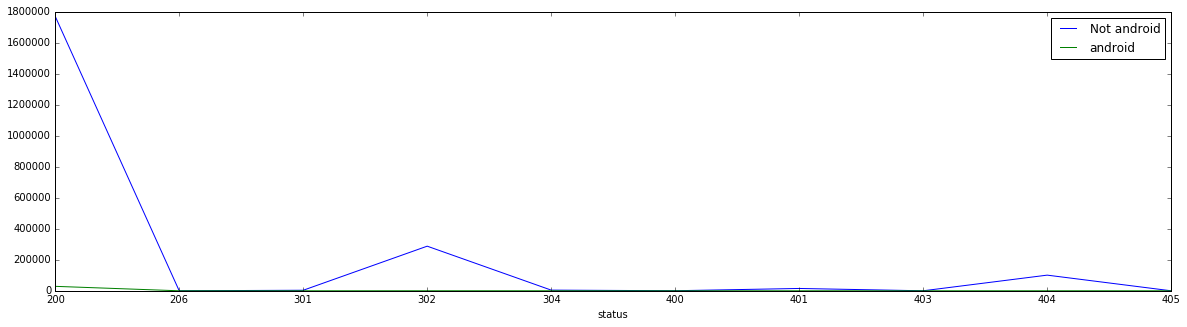

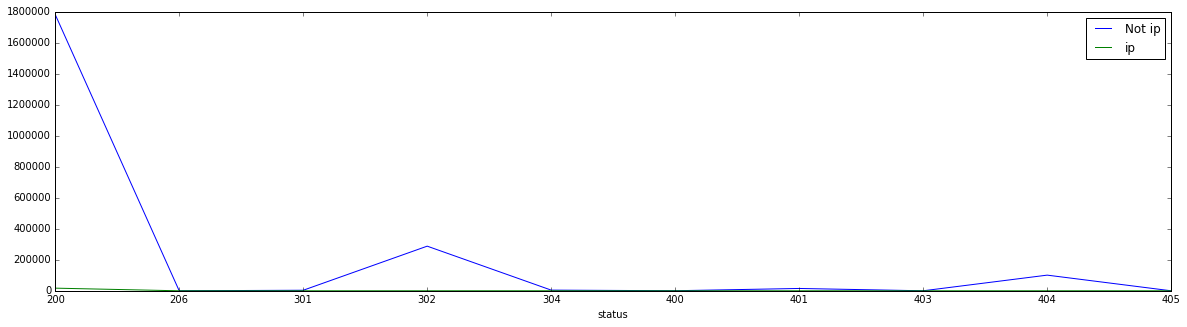

In [46]:
agg_counts[:10].plot()
agg_counts_ip[:10].plot()

In [48]:
indexer = agg_counts.sum(1).argsort()
indexer_ip = agg_counts_ip.sum(1).argsort()

In [32]:
indexer[:10]

status
200    11
206     9
301    10
302     7
304     1
400     5
401    15
403     2
404     4
405     6
dtype: int64

In [49]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset_ip = agg_counts_ip.take(indexer)[-10:]

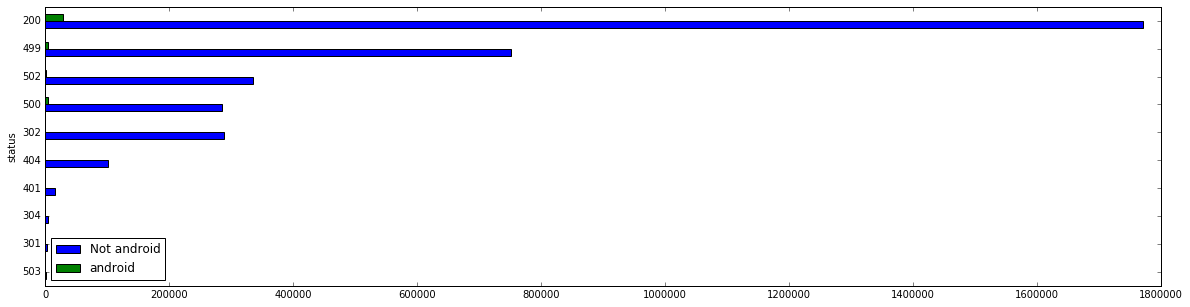

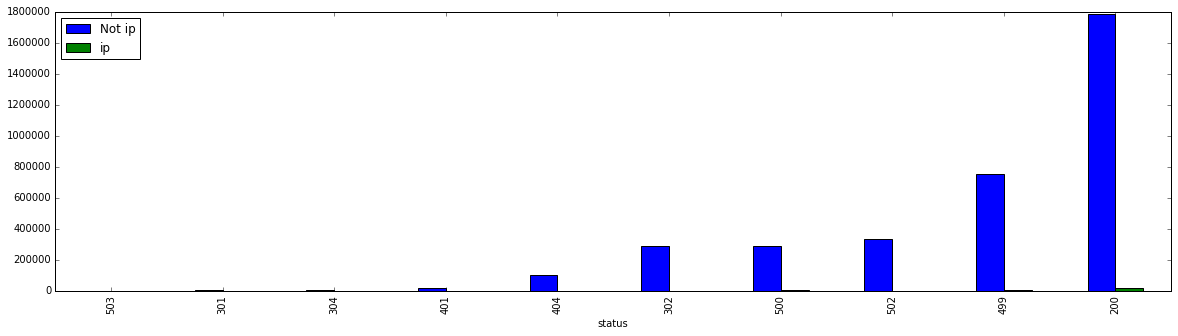

In [50]:
count_subset.plot(kind='barh')
count_subset_ip.plot(kind='bar')

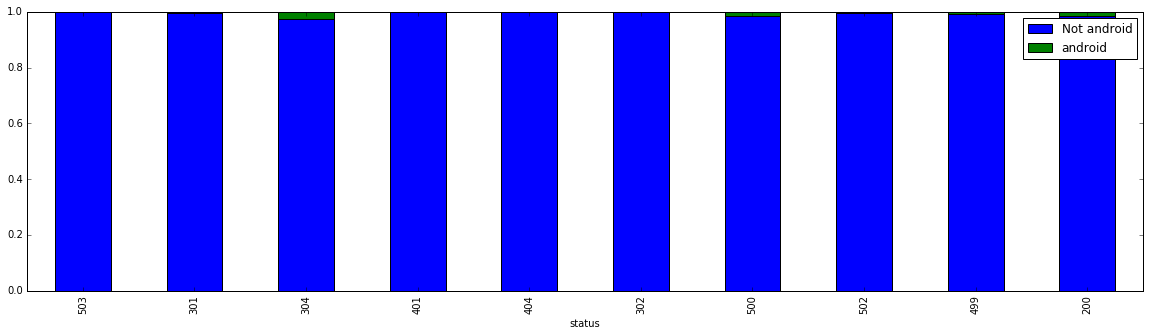

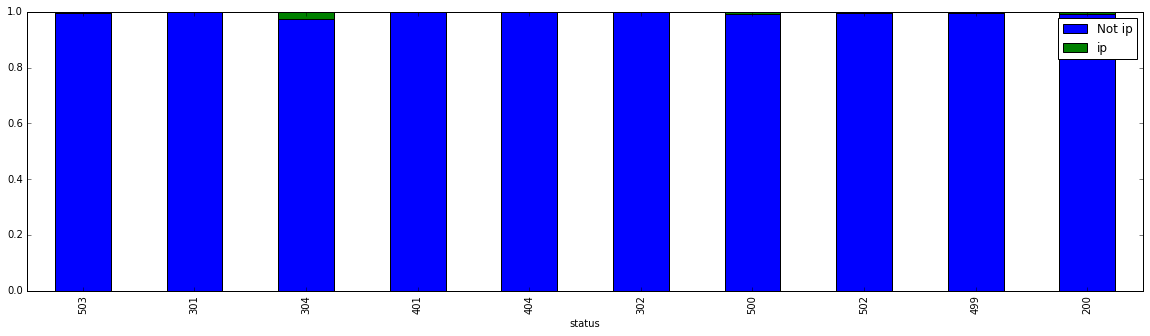

In [51]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='bar', stacked=True)
normed_subset_ip = count_subset_ip.div(count_subset.sum(1), axis=0)
normed_subset_ip.plot(kind='bar', stacked=True)

In [92]:
agent_w = np.where(df_agent['http_user_agent'].str.contains('weibo', case=True), 'Weibo', 'Not Weibo')

In [84]:
for i in result:
    if i[7].find('Micro') != -1:
        print(i)
        break

['0.000', '211.139.151.74', 'http://app.gaokaozhitongche.com/wycf/getGaokaoScore?province=guangdong', datetime.datetime(2016, 6, 25, 3, 24, 30), 'GET /assets/3263c067/css/font-awesome.min.css HTTP/1.1', '14432', '200', 'Mozilla/5.0 (Linux; Android 5.1; m1 note Build/LMY47D) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/37.0.0.0 Mobile MQQBrowser/6.2 TBS/036524 Safari/537.36 MicroMessenger/6.3.18.800 NetType/cmwap Language/zh_CN', 'app.gaokaozhitongche.com']


In [93]:
by_status_agent_w = df_agent.groupby(['status', agent_w])

In [94]:
agg_counts_w = by_status_agent_w.size().unstack().fillna(0)

In [95]:
indexer_w = agg_counts_w.sum(1).argsort()

In [96]:
count_subset_w = agg_counts_w.take(indexer_w)[-10:]

In [97]:
normed_subset_w = count_subset_w.div(count_subset_w.sum(1), axis=0)

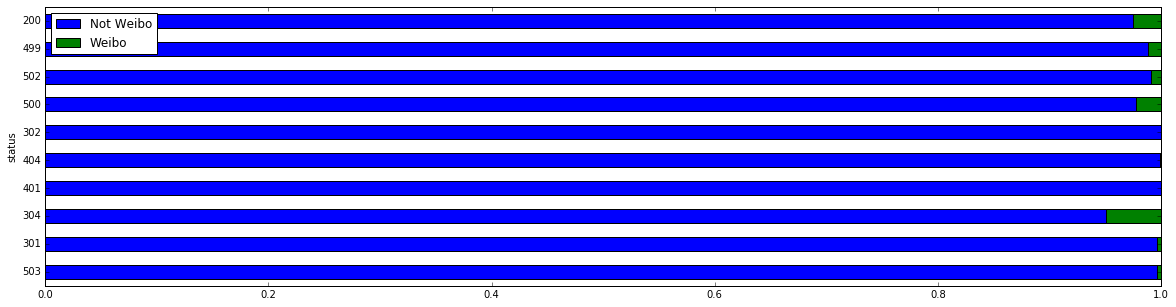

In [91]:
normed_subset_w.plot(kind='barh', stacked=True)